4. Implement a PCA function without using the available packages/libraries in R/Python. The input parameters of this function are the data matrix 𝐗 and a Boolean flag “isCorrMX.” The Boolean flag allows users to choose if the correlation matrix is used when set TRUE; otherwise, the covariance matrix would be decomposed. You can start with the function of Spectral Decomposition or Singular Value Decomposition.


a) (15%) Necessary outputs are:
• the loading matrix;
• the eigenvalue value vector;
• the score matrix, i.e., the matrix of principal components; and
• the scree plot where eigenvalues are shown as bars and cumulative variance explained is drawn as a line (similar to the one on p. 36 of DA04).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler

def plot_eigvals(eigVals): 
  x_axis=[]
  y = []
  y_culmulated = []
  total_val = eigVals.sum() 
  y_culmulated.append(eigVals[0]/total_val) 
  for i in range(0,len(eigVals)):
    x_axis.append(i) 
    y.append(eigVals[i]/total_val) 
    if i !=0 :
      y_culmulated.append((eigVals[i]/total_val+y_culmulated[i-1]))
      print("y_culmulated",y_culmulated )
  
  
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx() 


  ax2.set_xlabel("PC numbers")
  ax1.set_ylabel("Variance")
  ax1.bar(x_axis, eigVals, color="blue")


  ax2.set_ylabel("Cumulative Percentage") 
  ax2.plot(x_axis,y_culmulated , color="red")


def onedin_plot(projected_X):
  result = pd.DataFrame(projected_X, columns=['PC1'])
  result['y-axis'] = 0.0
  sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False)

  # title
  plt.title('PCA result')

  


def pca_function(X, isCorrMX):
  features = X.T
  if isCorrMX == True:
    matrix = np.corrcoef(features)
  else:
    matrix = np.cov(features)

  eig_vals, eig_vecs = np.linalg.eig(matrix)
  eig_vals[0]/sum(eig_vals)
  projected_X = X.dot(eig_vecs.T[0])

  onedin_plot(projected_X)
  plot_eigvals(eig_vals)


  return matrix, eig_vals, eig_vecs


b. (5%) Demonstrate your PCA function using the AutoMPG dataset. By comparing the results of “isCorrMX == TRUE” and “isCorrMX == FALSE”, do you think PCA is scale-invariant?

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/homework_5/auto-mpg.csv', sep=";", header=None, names=['Mpg', 'Cylinders', 'Displacement' ,'Horsepower', 'Weight', 'Acceleration', 'Model year', 'Origin', 'Car name'])


df.head()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin,Car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# X is feature vectors
X = df [['Mpg', 'Cylinders', 'Displacement' ,'Horsepower', 'Weight', 'Acceleration', 'Model year', 'Origin']]
X

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1
388,44.0,4,97.0,52,2130,24.6,82,2
389,32.0,4,135.0,84,2295,11.6,82,1
390,28.0,4,120.0,79,2625,18.6,82,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


y_culmulated [0.997536268412888, 0.9995995239909548]
y_culmulated [0.997536268412888, 0.9995995239909548, 0.9999560258433218]
y_culmulated [0.997536268412888, 0.9995995239909548, 0.9999560258433218, 0.9999877109744464]
y_culmulated [0.997536268412888, 0.9995995239909548, 0.9999560258433218, 0.9999877109744464, 0.9999952641549913]
y_culmulated [0.997536268412888, 0.9995995239909548, 0.9999560258433218, 0.9999877109744464, 0.9999952641549913, 0.9999991567975406]
y_culmulated [0.997536268412888, 0.9995995239909548, 0.9999560258433218, 0.9999877109744464, 0.9999952641549913, 0.9999991567975406, 0.9999996478554528]
y_culmulated [0.997536268412888, 0.9995995239909548, 0.9999560258433218, 0.9999877109744464, 0.9999952641549913, 0.9999991567975406, 0.9999996478554528, 0.9999999999999999]


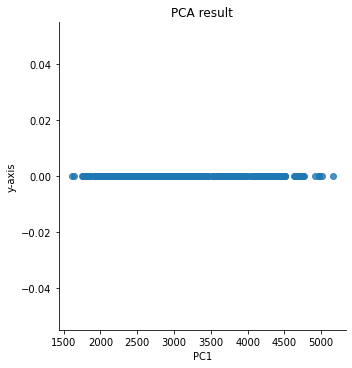

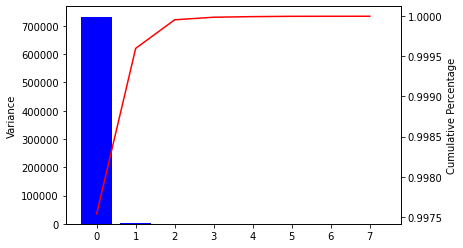

In [5]:
matrix, eig_vals, eig_vecs = pca_function(X, False)

In [6]:
# eigen vector and eigen values from covariance matrix 
print('Load Matrix \n%s' %matrix)
print('Eigenvector \n%s' %eig_vecs)
print('Eigenvalues \n%s' %eig_vals)

Load Matrix 
[[ 6.09181419e+01 -1.03529281e+01 -6.57585207e+02 -2.33857926e+02
  -5.51744070e+03  9.11551438e+00  1.66914766e+01  3.55351010e+00]
 [-1.03529281e+01  2.90969649e+00  1.69721949e+02  5.53482436e+01
   1.30042436e+03 -2.37505219e+00 -2.17192964e+00 -7.81734433e-01]
 [-6.57585207e+02  1.69721949e+02  1.09503676e+04  3.61403374e+03
   8.29291001e+04 -1.56994435e+02 -1.42572133e+02 -5.18007921e+01]
 [-2.33857926e+02  5.53482436e+01  3.61403374e+03  1.48156939e+03
   2.82656202e+04 -7.31869670e+01 -5.90364320e+01 -1.41127407e+01]
 [-5.51744070e+03  1.30042436e+03  8.29291001e+04  2.82656202e+04
   7.21484709e+05 -9.76815253e+02 -9.67228457e+02 -4.00266050e+02]
 [ 9.11551438e+00 -2.37505219e+00 -1.56994435e+02 -7.31869670e+01
  -9.76815253e+02  7.61133123e+00  2.95046192e+00  4.72788246e-01]
 [ 1.66914766e+01 -2.17192964e+00 -1.42572133e+02 -5.90364320e+01
  -9.67228457e+02  2.95046192e+00  1.35699149e+01  5.38650243e-01]
 [ 3.55351010e+00 -7.81734433e-01 -5.18007921e+01 -1.411

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


y_culmulated [0.6719840378371841, 0.7899419455491004]
y_culmulated [0.6719840378371841, 0.7899419455491004, 0.8913974014119522]
y_culmulated [0.6719840378371841, 0.7899419455491004, 0.8913974014119522, 0.95216689351586]
y_culmulated [0.6719840378371841, 0.7899419455491004, 0.8913974014119522, 0.95216689351586, 0.9750202144750866]
y_culmulated [0.6719840378371841, 0.7899419455491004, 0.8913974014119522, 0.95216689351586, 0.9750202144750866, 0.9893104552509677]
y_culmulated [0.6719840378371841, 0.7899419455491004, 0.8913974014119522, 0.95216689351586, 0.9750202144750866, 0.9893104552509677, 0.9933066477212246]
y_culmulated [0.6719840378371841, 0.7899419455491004, 0.8913974014119522, 0.95216689351586, 0.9750202144750866, 0.9893104552509677, 0.9933066477212246, 0.9999999999999999]


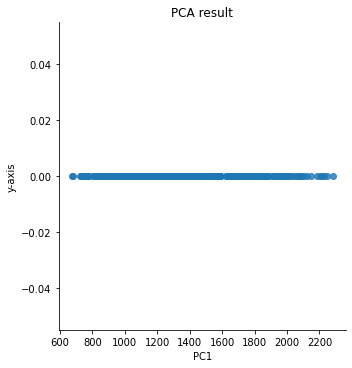

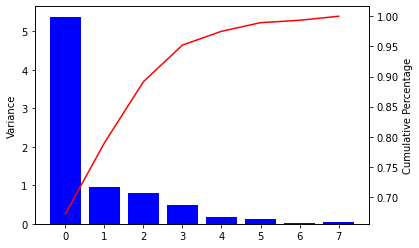

In [7]:
matrix, eig_vals, eig_vecs = pca_function(X, True)

In [8]:
# eigen vector and eigen values from correlation matrix 
print('Load Matrix \n%s' %matrix)
print('Eigenvector \n%s' %eig_vecs)
print('Eigenvalues \n%s' %eig_vals)

Load Matrix 
[[ 1.         -0.77761751 -0.80512695 -0.77842678 -0.83224421  0.42332854
   0.58054097  0.56520876]
 [-0.77761751  1.          0.9508233   0.84298336  0.89752734 -0.50468338
  -0.34564744 -0.56893159]
 [-0.80512695  0.9508233   1.          0.897257    0.9329944  -0.5438005
  -0.36985521 -0.61453511]
 [-0.77842678  0.84298336  0.897257    1.          0.86453774 -0.68919551
  -0.41636148 -0.45517145]
 [-0.83224421  0.89752734  0.9329944   0.86453774  1.         -0.4168392
  -0.30911988 -0.58500535]
 [ 0.42332854 -0.50468338 -0.5438005  -0.68919551 -0.4168392   1.
   0.29031611  0.21274581]
 [ 0.58054097 -0.34564744 -0.36985521 -0.41636148 -0.30911988  0.29031611
   1.          0.18152772]
 [ 0.56520876 -0.56893159 -0.61453511 -0.45517145 -0.58500535  0.21274581
   0.18152772  1.        ]]
Eigenvector 
[[-0.38586239  0.07663269  0.29228579  0.09998251 -0.74036644 -0.38735165
   0.1151321   0.19588516]
 [ 0.4023885   0.13842878  0.07223935 -0.21603551 -0.48261485  0.53092548


PCA is not scale invariant. If the features are of different units (e.g. dollars and miles and kilograms and numbers of products), we should standardized the data.
